In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.info()

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [46]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [8]:
training_set = dataset_train.iloc[:, 1:2].values
training_set


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [20]:
X_train = []
y_train = []
for i in range (60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)    
    
 
    
    
    

In [23]:
X_train


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [24]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [25]:
len(X_train)

1198

In [26]:
len(y_train)

1198

In [28]:
X_train.shape[1]

60

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [39]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
         
              

In [40]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
              

In [41]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
              

In [42]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
              

In [43]:
regressor.add(Dense(units = 1))

In [44]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0352
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0056
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0059A: 0s - loss: 0
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047A: 4 - ETA: 1s - los
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045A: 2s -
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/st

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 92/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 93/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 94/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014A: 2s
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016A: 0s - loss: 0.00


In [45]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [51]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [56]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range (60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    


In [57]:
predicted_stock_price

array([[790.0489 ],
       [787.36334],
       [787.5181 ],
       [788.6968 ],
       [791.85547],
       [797.5654 ],
       [802.8314 ],
       [805.0526 ],
       [805.4669 ],
       [805.1684 ],
       [804.7313 ],
       [804.2554 ],
       [803.9366 ],
       [804.42053],
       [805.4036 ],
       [810.0249 ],
       [816.8461 ],
       [824.17694],
       [828.1822 ],
       [824.18146]], dtype=float32)

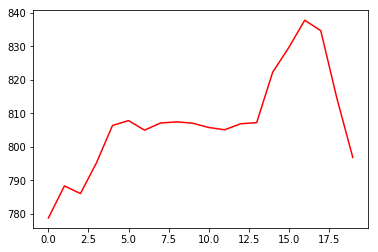

In [58]:
plt.plot(real_stock_price, color = 'red', label = 'Google real stock price')

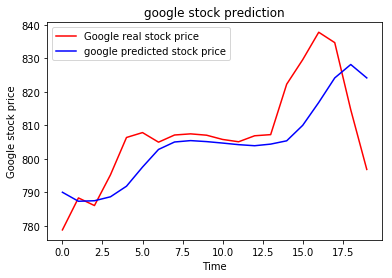

In [59]:
plt.plot(real_stock_price, color = 'red', label = 'Google real stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'google predicted stock price')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.title('google stock prediction')
plt.legend()
plt.show()